**Estudiante:** César Emilio García Ávalos

**Actividad:** M2_AI2_Gestión de facturas

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ruta = ('https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/datos_facturas.csv?_sm_au_=iVVjpm8RlpHJHq5F26q8vKHV6CTMc')
datos = pd.read_csv(ruta, sep = ';')
df = pd.DataFrame(datos)
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18,118
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27,177
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,"13,5","88,5"
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36,236
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,"22,5","147,5"


In [57]:
#Conversion de la variable total pagado a numérica para realizar cálculos
if df['total_pagado'].dtype == object:
  df['total_pagado'] = pd.to_numeric(df['total_pagado'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")

In [58]:
#Cálculo de media de la columna total pagado del dataframe df
mediaTP = df['total_pagado'].mean()
print('Media total pagado:', mediaTP)
#Cálculo de mediana de la columna total pagado del dataframe df
medianaTP = df['total_pagado'].median()
print('Mediana total pagado:', medianaTP)
#Este método calcula la moda de los valores en la columna 'total_pagado'. La función mode() en pandas retorna
#una serie que contiene los valores de moda, ya que puede haber más de uno si hay empates.
#[0]: Como la moda puede ser una serie (en caso de empate) y solo queremos el primer valor de moda, accedemos a él utilizando [0].
modaTP = df['total_pagado'].mode()[0]
print('Moda total pagado:', modaTP)

Media total pagado: 147.30888888888887
Mediana total pagado: 135.0
Moda total pagado: 118.0


In [59]:
#Se calcula el rango utilizando una función de NumPy que calcula el rango de un array, que es la diferencia entre el valor máximo y el valor mínimo.
rangoTP = np.ptp(df['total_pagado'])
#Este método calcula la varianza de los valores en la columna 'total_pagado'.
#La varianza es una medida de dispersión que indica qué tan dispersos están los valores con respecto a la media.
varianzaTP = df['total_pagado'].var()
#Este método calcula la desviación estándar de los valores en la columna 'total_pagado'.
#La desviación estándar es otra medida de dispersión que indica la dispersión promedio de los valores con respecto a la media.
desvTP = df['total_pagado'].std()
#Aquí se calcula el coeficiente de variación, que es una medida relativa de la dispersión de los datos.
#Se calcula dividiendo la desviación estándar por la media y multiplicándolo por 100 para expresarlo como un porcentaje.
coeficiente_variacionTP = (desvTP / df['total_pagado'].mean()) * 100
print("Rango:", rangoTP)
print("Varianza:", varianzaTP)
print("Desviación estándar:", desvTP)
print("Coeficiente de variación:", coeficiente_variacionTP)


Rango: 206.5
Varianza: 3356.593555555555
Desviación estándar: 57.93611615871015
Coeficiente de variación: 39.329681050279184


In [60]:
#Se calcula el rango intercuartílico, que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1).
#Se obtiene restando el valor del tercer cuartil (quantile(0.75)) del valor del primer cuartil (quantile(0.25)).
rango_intercuartilico = df['total_pagado'].quantile(0.75) - df['total_pagado'].quantile(0.25)
#Se calcula el primer cuartil, que es el valor por debajo del cual cae el 25% de los datos. Esto se hace utilizando el método quantile(0.25).
cuartil_primero = df['total_pagado'].quantile(0.25)
#Se calcula el percentil 90, que es el valor por debajo del cual cae el 90% de los datos. Esto se hace utilizando el método quantile(0.90).
percentil_90 = df['total_pagado'].quantile(0.90)
print("Rango intercuartílico:", rango_intercuartilico)
print("Cuartil primero (percentil 25):", cuartil_primero)
print("Percentil 90:", percentil_90)

Rango intercuartílico: 81.0
Cuartil primero (percentil 25): 108.0
Percentil 90: 236.0


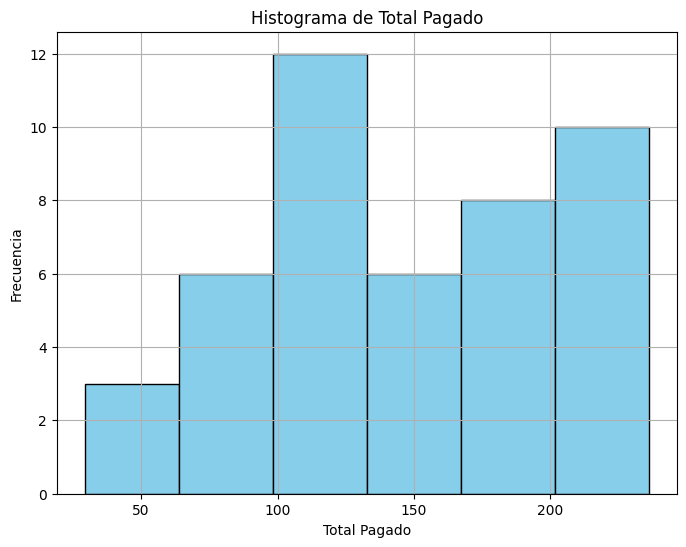

In [61]:
kurtosis = df['total_pagado'].kurtosis()
#Se calcula el apuntamiento, que es una medida alternativa de la forma de la distribución. Se calcula restando el valor de la kurtosis de 3.
#Esto se hace para que una distribución normal tenga un apuntamiento de 0.
apuntamiento = 3 - df['total_pagado'].kurtosis()
#Calculando el número óptimo de bins usando la regla de Sturges
n_bins = int(1 + np.log2(len(df['total_pagado'])))
#Ploteo del histograma usando matplot
plt.figure(figsize=(8,6))
plt.hist(df['total_pagado'], bins = n_bins, color = 'skyblue', edgecolor='black')
plt.title('Histograma de Total Pagado')
plt.xlabel('Total Pagado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

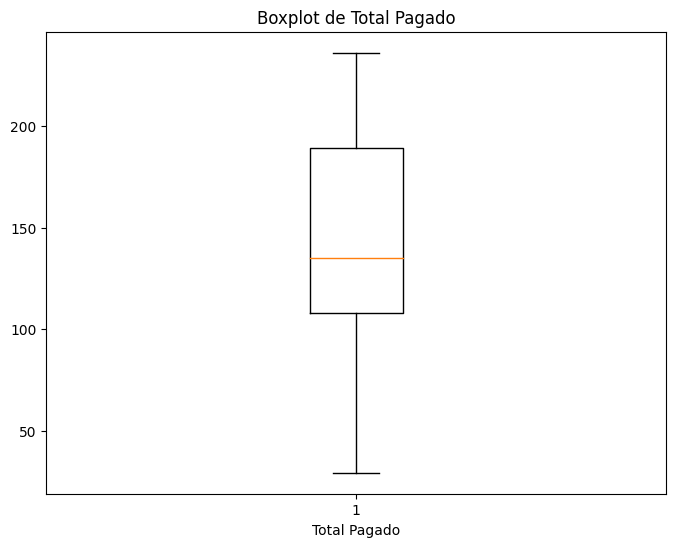

In [62]:
#Ploteo del boxplot usando matplot, el box plot no muestra valores atípicos, los bigotes se extienden de 29 a 236 en cuanto al total pagado
#La media está ubicada en 147.30, además de observar la mediana ubicada en 135
plt.figure(figsize=(8, 6))
plt.boxplot(df['total_pagado'])
plt.title('Boxplot de Total Pagado')
plt.xlabel('Total Pagado')
plt.show()

**Comentarios Parte 1:**
*  La media del total pagado es de aproximadamente 147.31 unidades monetarias. Esto significa que, en promedio, el monto total pagado en todas las facturas es alrededor de 147.31 unidades monetarias.
*   La mediana del total pagado es de 135 unidades monetarias. Esto indica que el valor medio del total pagado está en el centro del conjunto de datos, y la mitad de los valores están por encima y la otra mitad por debajo de este valor.
*   La moda del total pagado es de 118 unidades monetarias. Esto indica que el valor más común o frecuente del total pagado en las facturas es de 118 unidades monetarias.
*   El rango del total pagado es de 206.5 unidades monetarias. Esto representa la diferencia entre el valor máximo y el valor mínimo de los pagos realizados en todas las facturas.
*   La varianza del total pagado es de aproximadamente 3356.59 unidades monetarias al cuadrado. Indica cuánto se dispersan los valores del total pagado alrededor de la media.
*   La desviación estándar del total pagado es de aproximadamente 57.94 unidades monetarias. Es una medida de dispersión que indica cuánto se alejan los valores del total pagado de la media.
*   El coeficiente de variación es del 39.33%. Esto indica la variabilidad relativa de los pagos en relación con la media. Un valor alto sugiere una alta variabilidad en los pagos en relación con la media.
*   El rango intercuartílico es de 81 unidades monetarias. Esto indica la dispersión de los datos dentro del rango intercuartílico, que abarca el 50% central de los datos.
*   El cuartil primero (percentil 25) es de 108 unidades monetarias. Esto significa que el 25% de los pagos son iguales o inferiores a este valor.
*   El percentil 90 es de 236 unidades monetarias. Esto indica que el 90% de los pagos son iguales o inferiores a este valor.











In [63]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas que han sido pagadas.
df_filtrado = df.loc[df['factura_pagada']=='si']
#Se agrupan los datos filtrados por el nombre del cliente y calcula la suma total pagada por cada cliente.
cliente_mas_pago = df_filtrado.groupby('cliente')['total_pagado'].sum()
print(cliente_mas_pago)
print('Los clientes A y D han pagado la misma cantidad en facturas')

cliente
clienteA    1534.0
clienteB     924.0
clienteC     584.5
clienteD    1534.0
Name: total_pagado, dtype: float64
Los clientes A y D han pagado la misma cantidad en facturas


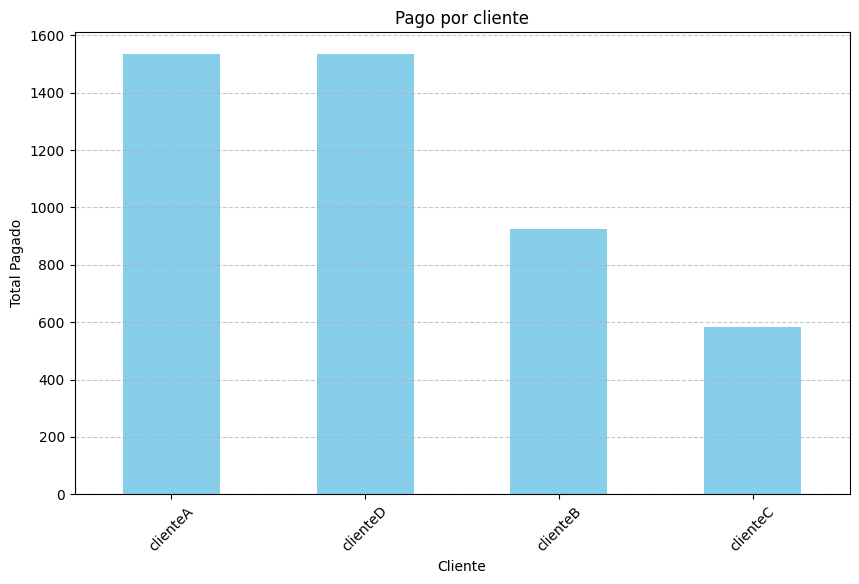

In [64]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas que han sido pagadas.
df_filtrado = df.loc[df['factura_pagada']=='si']
#Se agrupan los datos filtrados por el nombre del cliente y calcula la suma total pagada por cada cliente.
#Luego, utiliza idxmax() para encontrar el índice del cliente que ha pagado más (es decir, el cliente que tiene la suma total pagada más alta).
cliente_mas_pago = df_filtrado.groupby('cliente')['total_pagado'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
cliente_mas_pago.plot(kind='bar', color='skyblue')
plt.title('Pago por cliente')
plt.xlabel('Cliente')
plt.ylabel('Total Pagado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [65]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'mes' es igual a 'Febrero' y donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas pagadas en febrero.
febrero_df = df.loc[(df['mes']=='Febrero') & (df['factura_pagada']=='si')]
#value_counts() cuenta el número de veces que aparece cada cliente en el DataFrame filtrado y idxmin() devuelve el índice correspondiente al mínimo valor,
#que es el cliente que ha pagado menos facturas.
cliente_menos_facturas = febrero_df['cliente'].value_counts().idxmin()
numero_facturas_menos = febrero_df['cliente'].value_counts().min()
print("El cliente que ha pagado menos facturas en febrero es:", cliente_menos_facturas)
print("Número de facturas pagadas por este cliente en febrero:", numero_facturas_menos)

El cliente que ha pagado menos facturas en febrero es: clienteC
Número de facturas pagadas por este cliente en febrero: 1


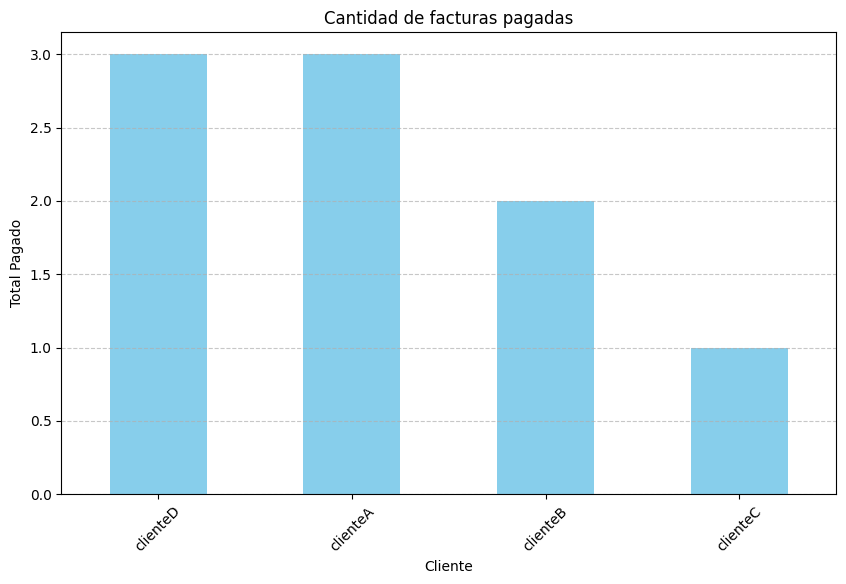

In [66]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'mes' es igual a 'Febrero' y donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas pagadas en febrero.
febrero_df = df.loc[(df['mes']=='Febrero') & (df['factura_pagada']=='si')]
#value_counts() cuenta el número de veces que aparece cada cliente en el DataFrame filtrado y idxmin() devuelve el índice correspondiente al mínimo valor,
#que es el cliente que ha pagado menos facturas.
cliente_menos_facturas = febrero_df['cliente'].value_counts()
plt.figure(figsize=(10, 6))
cliente_menos_facturas.plot(kind='bar', color='skyblue')
plt.title('Cantidad de facturas pagadas')
plt.xlabel('Cliente')
plt.ylabel('Total Pagado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Comentarios Parte 2:**


*   Cliente más rentable: El cliente "clienteA" ha pagado el total más alto en todas las facturas. Sería beneficioso para la compañía mantener una relación sólida con este cliente y explorar oportunidades para aumentar la participación de este cliente, ofreciendo descuentos o servicios adicionales.

*   Cliente menos activo en febrero: El cliente "clienteC" ha pagado el menor número de facturas en febrero. Sería importante investigar las razones detrás de esta baja actividad y considerar estrategias para fomentar una mayor participación de este cliente, como ofrecer incentivos especiales o mejorar la calidad del servicio.



In [67]:
#Se realiza la conversión de tipo de dato de la columna IVA a numérico para poder operar con ella
if df['IVA'].dtype == object:
  df['IVA'] = pd.to_numeric(df['IVA'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")
covarianza = df['IVA'].astype(float).cov(df['total_pagado'])
print("La covarianza entre el IVA y el total pagado es:", covarianza)

La covarianza entre el IVA y el total pagado es: 526.768808080808


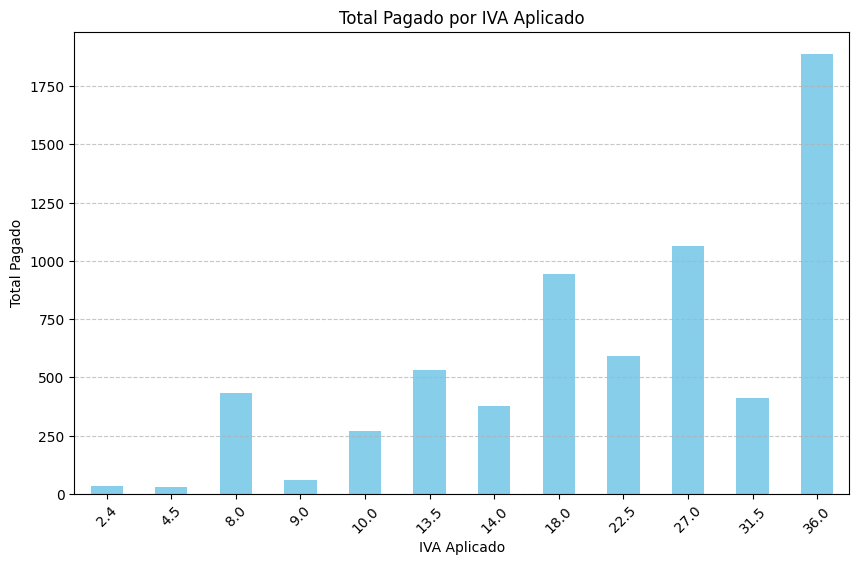

In [68]:
#Agrupa los datos en el DataFrame df por el valor de la columna 'IVA' y
#luego calcula la suma total pagada para cada categoría de IVA utilizando el método sum().
total_por_iva = df.groupby('IVA')['total_pagado'].sum()
#Se plotea el gráfico de barras utilizando matplot
plt.figure(figsize=(10, 6))
total_por_iva.plot(kind='bar', color='skyblue')
plt.title('Total Pagado por IVA Aplicado')
plt.xlabel('IVA Aplicado')
plt.ylabel('Total Pagado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Comentarios Parte 3:**
Basarse únicamente en el gráfico de dispersión y la covarianza para construir un modelo predictivo podría no ser suficiente, lógicamente cuando el valor del IVA aumenta, el total pagado tiende a aumentar también, y viceversa. Sin embargo, la magnitud de la covarianza no dice mucho sobre la fuerza de la relación o su significancia estadística, sería necesario utilizar otros métodos estadísticos, por ejemplo, análisis de correlaciones, regresiones, etc.

**Parte 4 Recomendaciones:**

1.   Mantener un enfoque en la retención y satisfacción del cliente, especialmente con clientes de alto valor como "clienteA".
2.   Implementar estrategias para incentivar la participación de clientes menos activos, como programas de fidelización o descuentos personalizados.
3. Monitorear de cerca las tendencias en los pagos y el comportamiento del cliente para identificar oportunidades de mejora y anticipar cambios en la demanda o el mercado.



